In [3]:
pip install seaborn

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
!pip install seaborn

In [5]:
pip install xgboost

   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.3/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.8/150.0 MB 3.0 MB/s eta 0:00:49
    --------------------------------------- 2.6/150.0 MB 5.6 MB/s eta 0:00:27
   - -------------------------------------- 5.0/150.0 MB 8.6 MB/s eta 0:00:17
   - -------------------------------------- 5.2/150.0 MB 6.5 MB/s eta 0:00:23
   - -------------------------------------- 5.2/150.0 MB 6.5 MB/s eta 0:00:23
   - -------------------------------------- 5.2/150.0 MB 6.5 MB/s eta 0:00:23
   - -------------------------------------- 5.2/150.0 MB 6.5 MB/s eta 0:00:23
   - -------------------------------------- 5.8/150.0 MB 3.4 MB/s eta 0:00:43
   - -------------------------------------- 6.0/150.0 MB 3.3 MB/s eta 0:00:44
   - -------------------------------------- 7.1/150.0 MB 3.3 MB/s eta 0:00:43
   - --


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor 
from sklearn.metrics import (
    mean_squared_error, r2_score, make_scorer
)

In [7]:
# Plots
sns.set_style("whitegrid")


In [8]:
# 1. Load Data 
df = pd.read_csv('sampled.csv')


print("Initial DataFrame Head:")
print(df.head())
print("\nDataFrame Info:")
df.info()
print("\nDataFrame Description:")
print(df.describe())



Initial DataFrame Head:
   Unnamed: 0  Age  Income  MonthsEmployed  DTIRatio  Education  \
0       42242   47   63758              47      0.81          0   
1       12964   41   75950              17      0.26          2   
2      240310   18   20010              97      0.82          0   
3       89393   39  126345             103      0.49          2   
4      122022   41   35005              39      0.23          3   

   EmploymentType  MaritalStatus  HasMortgage  HasDependents  LoanPurpose  \
0               0              2            0              0            1   
1               2              2            0              0            0   
2               1              2            0              0            2   
3               3              1            1              1            2   
4               3              1            0              1            4   

   HasCoSigner  CreditScore  
0            0          746  
1            1          458  
2            1      

In [9]:
# --- 2. Assigning Meaningful Categorical Labels ---
print("\n--- Assigning Meaningful Categorical Labels ---")

education_mapping = {
    0: 'Primary',
    1: 'Secondary',
    2: 'Undergraduate',
    3: 'Postgraduate'
}

employment_type_mapping = {
    0: 'Unemployed',
    1: 'Salaried',
    2: 'Self-Employed',
    3: 'Contract-Part-time'
}

marital_status_mapping = {
    0: 'Single',
    1: 'Married',
    2: 'Divorced/Widowed'
}

loan_purpose_mapping = {
    0: 'Debt Consolidation',
    1: 'Home Improvement',
    2: 'Business',
    3: 'Education',
    4: 'Other-Miscellaneous'
}

df['Education'] = df['Education'].map(education_mapping)
df['EmploymentType'] = df['EmploymentType'].map(employment_type_mapping)
df['MaritalStatus'] = df['MaritalStatus'].map(marital_status_mapping)
df['LoanPurpose'] = df['LoanPurpose'].map(loan_purpose_mapping)

print("\nDataFrame Head after mapping categorical values:")
print(df.head())
print("\nUnique values after mapping:")
print("Education:", df['Education'].unique())
print("EmploymentType:", df['EmploymentType'].unique())
print("MaritalStatus:", df['MaritalStatus'].unique())
print("LoanPurpose:", df['LoanPurpose'].unique())


--- Assigning Meaningful Categorical Labels ---

DataFrame Head after mapping categorical values:
   Unnamed: 0  Age  Income  MonthsEmployed  DTIRatio      Education  \
0       42242   47   63758              47      0.81        Primary   
1       12964   41   75950              17      0.26  Undergraduate   
2      240310   18   20010              97      0.82        Primary   
3       89393   39  126345             103      0.49  Undergraduate   
4      122022   41   35005              39      0.23   Postgraduate   

       EmploymentType     MaritalStatus  HasMortgage  HasDependents  \
0          Unemployed  Divorced/Widowed            0              0   
1       Self-Employed  Divorced/Widowed            0              0   
2            Salaried  Divorced/Widowed            0              0   
3  Contract-Part-time           Married            1              1   
4  Contract-Part-time           Married            0              1   

           LoanPurpose  HasCoSigner  CreditScor

In [10]:
# --- 3. Data Cleaning ---
print("\n--- Data Cleaning ---")
print("Missing values before cleaning:\n", df.isnull().sum())

# Handle missing values 
# For numerical features: mean, median, or mode imputation
# For categorical features: mode imputation or a 'Missing' category
for col in df.columns:
    if df[col].isnull().any():
        if df[col].dtype == 'object': # Categorical
            df[col].fillna(df[col].mode()[0], inplace=True)
        else: # Numerical
            df[col].fillna(df[col].median(), inplace=True) # Using median for numerical

print("\nMissing values after cleaning:\n", df.isnull().sum())


--- Data Cleaning ---
Missing values before cleaning:
 Unnamed: 0        0
Age               0
Income            0
MonthsEmployed    0
DTIRatio          0
Education         0
EmploymentType    0
MaritalStatus     0
HasMortgage       0
HasDependents     0
LoanPurpose       0
HasCoSigner       0
CreditScore       0
dtype: int64

Missing values after cleaning:
 Unnamed: 0        0
Age               0
Income            0
MonthsEmployed    0
DTIRatio          0
Education         0
EmploymentType    0
MaritalStatus     0
HasMortgage       0
HasDependents     0
LoanPurpose       0
HasCoSigner       0
CreditScore       0
dtype: int64


In [11]:
# Check for duplicates
print(f"\nNumber of duplicate rows before dropping: {df.duplicated().sum()}")
df.drop_duplicates(inplace=True)
print(f"Number of duplicate rows after dropping: {df.duplicated().sum()}")


Number of duplicate rows before dropping: 0
Number of duplicate rows after dropping: 0


In [22]:
df.describe()

,Unnamed: 0,Age,Income,MonthsEmployed,DTIRatio,HasMortgage,HasDependents,HasCoSigner,CreditScore
count,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000
mean,126218.597778,43.642222,84661.215556,59.888889,0.485244,0.495556,0.517778,0.466667,564.864444
std,74072.599944,14.586612,39258.824916,35.016714,0.231739,0.500537,0.500240,0.499443,158.651814
min,1768.000000,18.000000,16438.000000,0.000000,0.100000,0.000000,0.000000,0.000000,300.000000
25%,59234.250000,32.000000,50488.750000,31.000000,0.282500,0.000000,0.000000,0.000000,431.750000
50%,126066.000000,44.000000,85688.500000,61.000000,0.470000,0.000000,1.000000,0.000000,562.500000
75%,189798.000000,55.000000,118974.750000,91.000000,0.690000,1.000000,1.000000,1.000000,693.750000
max,255098.000000,69.000000,149964.000000,119.000000,0.900000,1.000000,1.000000,1.000000,849.000000



--- Exploratory Data Analysis (EDA) ---


C:\Users\Shirlyne\AppData\Local\Temp\ipykernel_18316\3826449971.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='CreditScoreRange', data=df, order=bin_labels, palette='viridis')


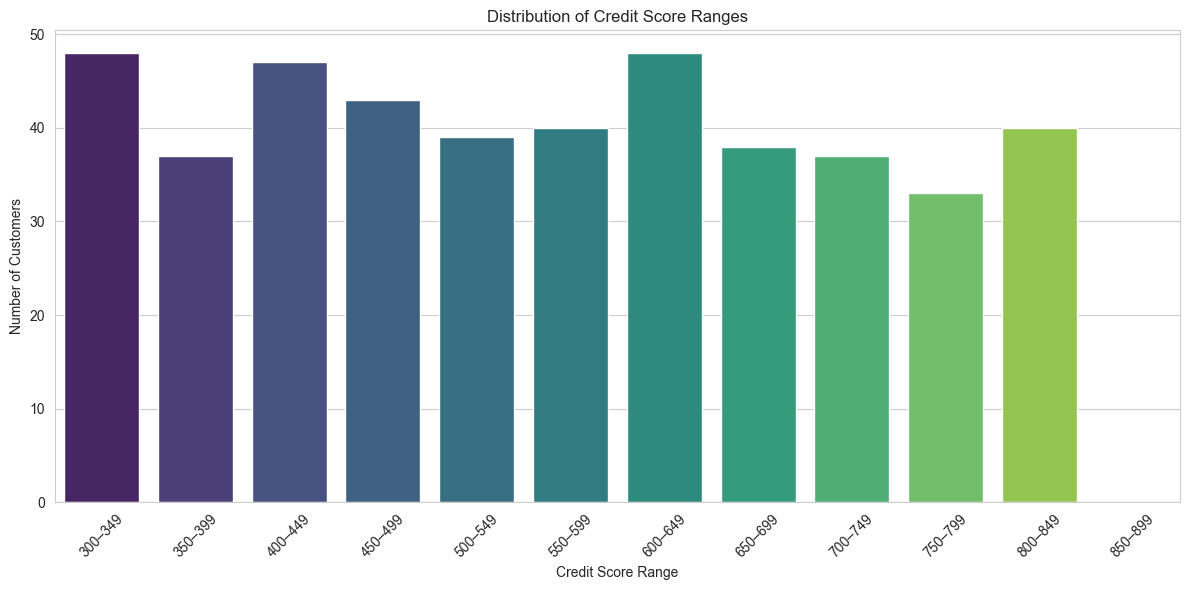


Credit Score Distribution by Range:
CreditScoreRange
300–349    48
350–399    37
400–449    47
450–499    43
500–549    39
550–599    40
600–649    48
650–699    38
700–749    37
750–799    33
800–849    40
850–899     0
Name: count, dtype: int64


In [23]:
# --- 4. EDA ---
print("\n--- Exploratory Data Analysis (EDA) ---")

# Step 1: Create bins from 300 to 900 in steps of 50
bin_edges = list(range(300, 901, 50))  # [300, 350, 400, ..., 900]
bin_labels = [f'{bin_edges[i]}–{bin_edges[i+1]-1}' for i in range(len(bin_edges)-1)]

# Step 2: Bin the CreditScore column
df['CreditScoreRange'] = pd.cut(df['CreditScore'], bins=bin_edges, labels=bin_labels, include_lowest=True)

# Step 3: Plot the binned distribution
plt.figure(figsize=(12, 6))
sns.countplot(x='CreditScoreRange', data=df, order=bin_labels, palette='viridis')
plt.title('Distribution of Credit Score Ranges')
plt.xlabel('Credit Score Range')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Step 4: Show distribution table
print("\nCredit Score Distribution by Range:")
print(df['CreditScoreRange'].value_counts().sort_index())



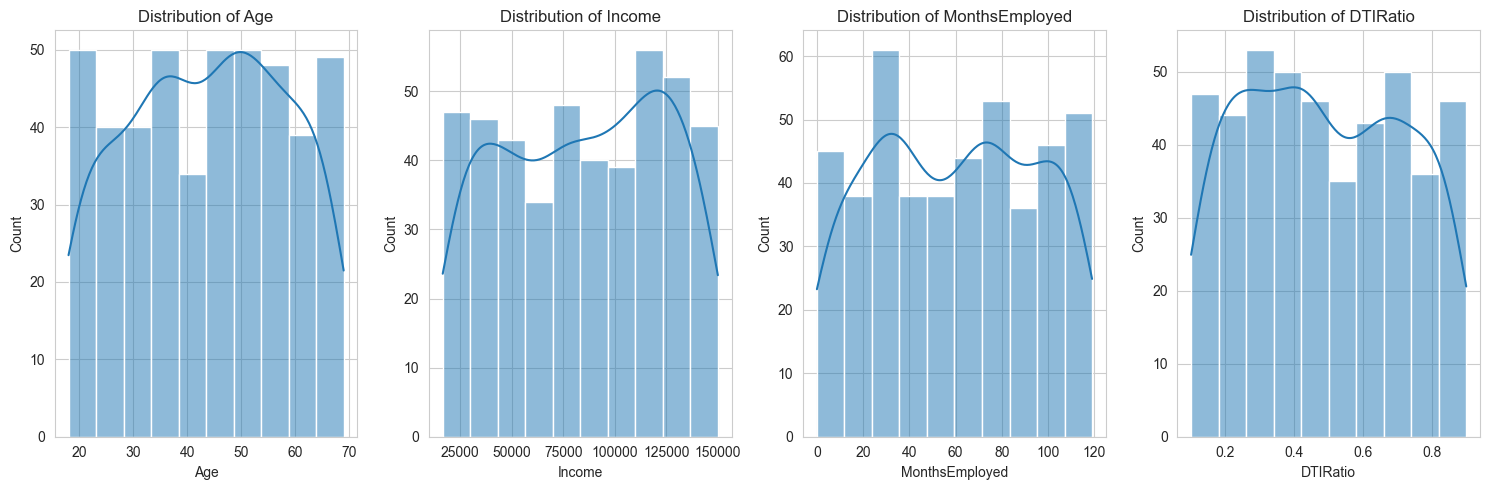

In [24]:
# Numerical features distribution
numerical_cols = ['Age', 'Income', 'MonthsEmployed', 'DTIRatio']
plt.figure(figsize=(15, 5))
for i, col in enumerate(numerical_cols):
    plt.subplot(1, len(numerical_cols), i + 1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()


--- Frequency of Each Categorical Variable ---


C:\Users\Shirlyne\AppData\Local\Temp\ipykernel_18316\2755507410.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='pastel')
C:\Users\Shirlyne\AppData\Local\Temp\ipykernel_18316\2755507410.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='pastel')
C:\Users\Shirlyne\AppData\Local\Temp\ipykernel_18316\2755507410.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='pastel')
C:\Users\Shirlyne\AppData\Local\Temp\ipykernel_18316\2755507410.py:10: FutureWarning: 



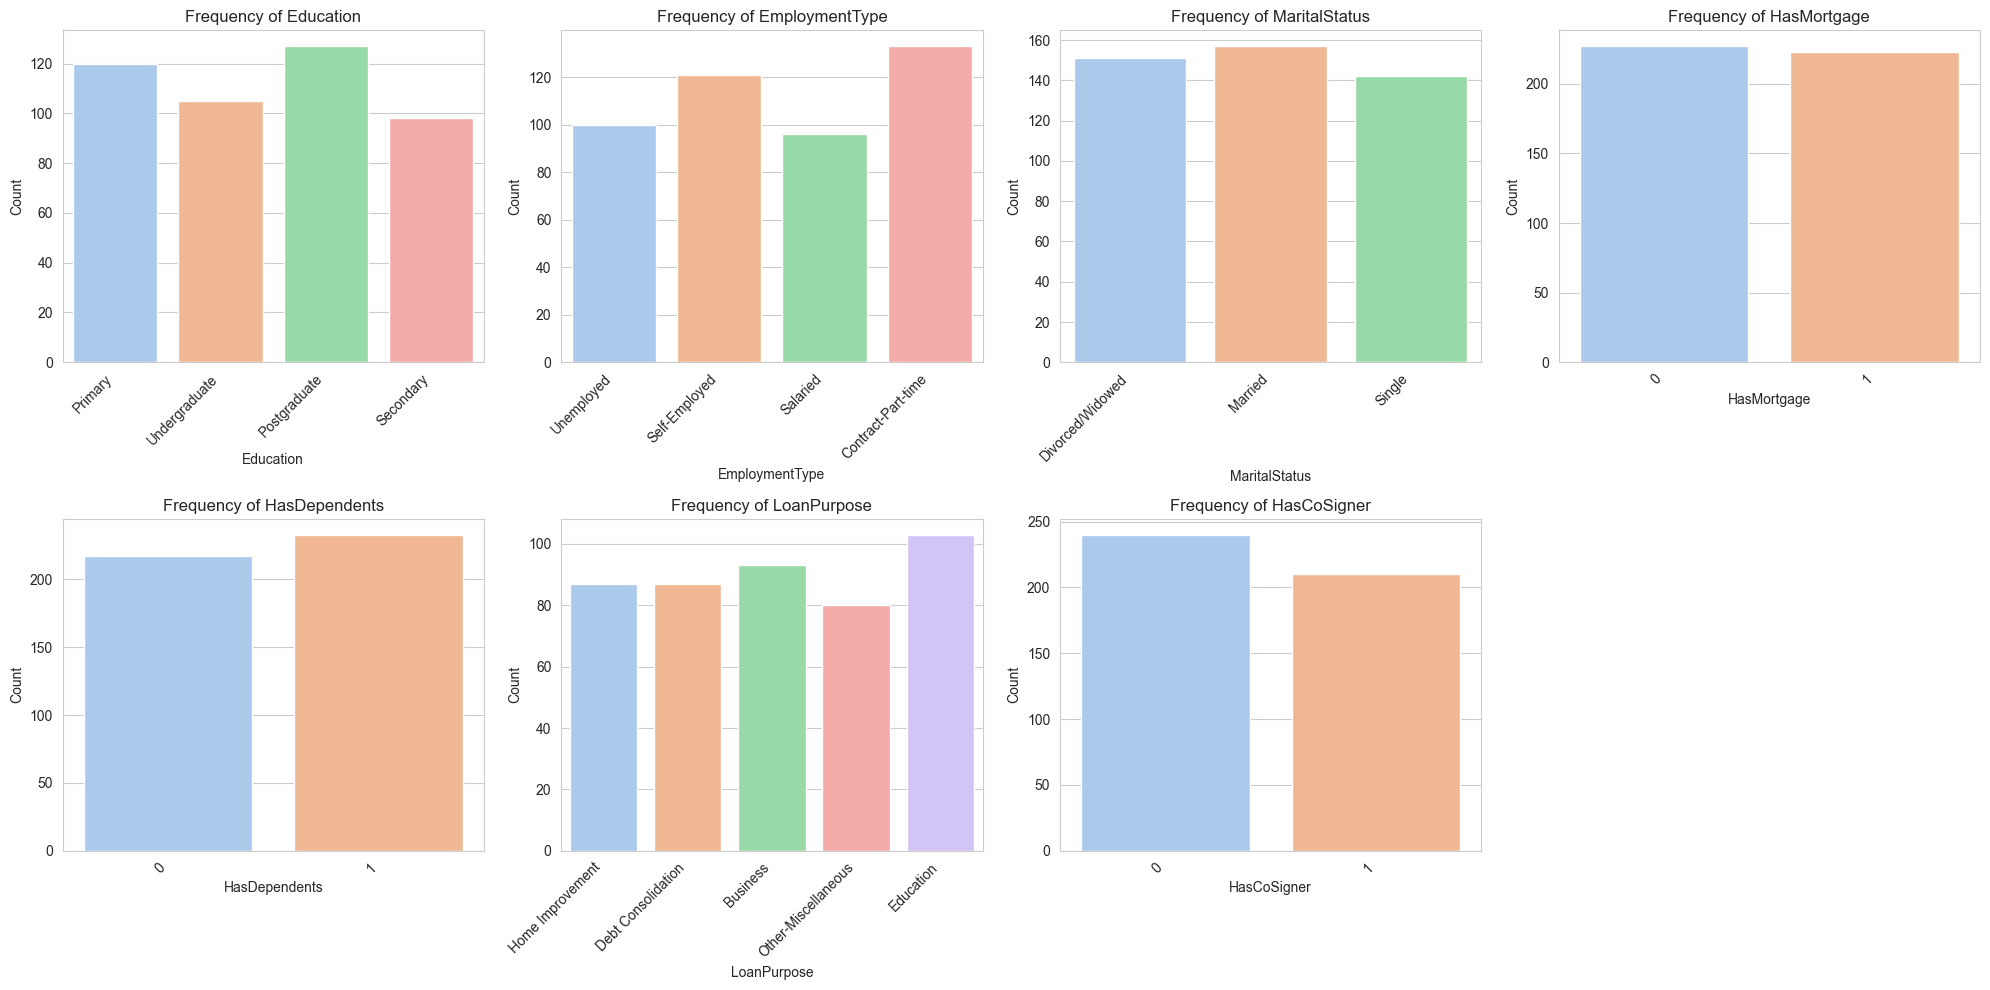


Frequency Table for Education:
Education
Postgraduate     127
Primary          120
Undergraduate    105
Secondary         98
Name: count, dtype: int64

Frequency Table for EmploymentType:
EmploymentType
Contract-Part-time    133
Self-Employed         121
Unemployed            100
Salaried               96
Name: count, dtype: int64

Frequency Table for MaritalStatus:
MaritalStatus
Married             157
Divorced/Widowed    151
Single              142
Name: count, dtype: int64

Frequency Table for HasMortgage:
HasMortgage
0    227
1    223
Name: count, dtype: int64

Frequency Table for HasDependents:
HasDependents
1    233
0    217
Name: count, dtype: int64

Frequency Table for LoanPurpose:
LoanPurpose
Education              103
Business                93
Home Improvement        87
Debt Consolidation      87
Other-Miscellaneous     80
Name: count, dtype: int64

Frequency Table for HasCoSigner:
HasCoSigner
0    240
1    210
Name: count, dtype: int64


In [27]:
# --- Frequency Distribution of Categorical Variables ---
print("\n--- Frequency of Each Categorical Variable ---")

categorical_cols = ['Education', 'EmploymentType', 'MaritalStatus', 'HasMortgage', 
                    'HasDependents', 'LoanPurpose', 'HasCoSigner']

plt.figure(figsize=(20, 10))
for i, col in enumerate(categorical_cols):
    plt.subplot(2, 4, i + 1)
    sns.countplot(x=col, data=df, palette='pastel')
    plt.title(f'Frequency of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

# Optional: print frequency tables for each categorical column
for col in categorical_cols:
    print(f"\nFrequency Table for {col}:\n{df[col].value_counts()}")


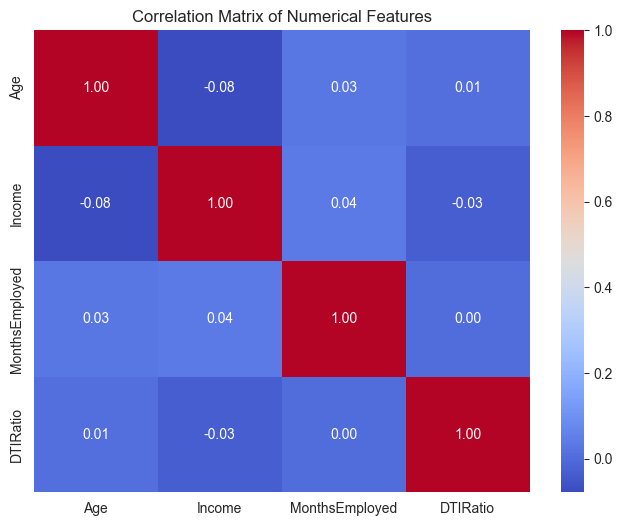

In [ ]:
# Relationship betw predictors - investigate Multicollinearity 
plt.figure(figsize=(8, 6))
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

In [36]:
df.head()

,Unnamed: 0,Age,Income,MonthsEmployed,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,CreditScore,CreditScoreRange
0,42242,47,63758,47,0.81,Primary,Unemployed,Divorced/Widowed,0,0,Home Improvement,0,746,700–749
1,12964,41,75950,17,0.26,Undergraduate,Self-Employed,Divorced/Widowed,0,0,Debt Consolidation,1,458,450–499
2,240310,18,20010,97,0.82,Primary,Salaried,Divorced/Widowed,0,0,Business,1,653,650–699
3,89393,39,126345,103,0.49,Undergraduate,Contract-Part-time,Married,1,1,Business,1,849,800–849
4,122022,41,35005,39,0.23,Postgraduate,Contract-Part-time,Married,0,1,Other-Miscellaneous,1,677,650–699


In [ ]:
df_copy = df.copy() 

In [39]:
df_copy = df_copy.drop(columns=['CreditScoreRange'])

In [44]:
# --- 5. Data Preprocessing ---
print("\n--- Data Preprocessing ---")

X = df_copy.drop('CreditScore', axis=1)
y = df_copy['CreditScore']


--- Data Preprocessing ---


In [45]:
X.head()

,Unnamed: 0,Age,Income,MonthsEmployed,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner
0,42242,47,63758,47,0.81,Primary,Unemployed,Divorced/Widowed,0,0,Home Improvement,0
1,12964,41,75950,17,0.26,Undergraduate,Self-Employed,Divorced/Widowed,0,0,Debt Consolidation,1
2,240310,18,20010,97,0.82,Primary,Salaried,Divorced/Widowed,0,0,Business,1
3,89393,39,126345,103,0.49,Undergraduate,Contract-Part-time,Married,1,1,Business,1
4,122022,41,35005,39,0.23,Postgraduate,Contract-Part-time,Married,0,1,Other-Miscellaneous,1


In [46]:
y.head()

0    746
1    458
2    653
3    849
4    677
Name: CreditScore, dtype: int64

In [47]:
df_copy.dtypes

Unnamed: 0          int64
Age                 int64
Income              int64
MonthsEmployed      int64
DTIRatio          float64
Education          object
EmploymentType     object
MaritalStatus      object
HasMortgage         int64
HasDependents       int64
LoanPurpose        object
HasCoSigner         int64
CreditScore         int64
dtype: object

In [48]:
# Identify numerical and categorical features for preprocessing pipeline
numerical_features = X.select_dtypes(include=np.number).columns.tolist()
categorical_features = X.select_dtypes(include='object').columns.tolist()


In [49]:
# Preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ],
    remainder='passthrough'
)

In [50]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")

X_train shape: (360, 12), y_train shape: (360,)
X_test shape: (90, 12), y_test shape: (90,)


In [ ]:
# --- 6. Model Training and Evaluation ---
print("\n--- Model Training and Evaluation ---")

models = {
    'RandomForestRegressor': RandomForestRegressor(random_state=42),
    'XGBRegressor': XGBRegressor(random_state=42) 
}


--- Model Training and Evaluation ---


In [ ]:
results = {}

for name, model in models.items():
    print(f"\nTraining {name}...")
    # Create a pipeline for each model that includes preprocessing
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('MLtraining', model)])

    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)


    # Accuracy Metrics 
    mse = mean_squared_error(y_test, y_pred) 
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred) 

    # Store results
    results[name] = {
        'MSE': mse,
        'RMSE': rmse,
        'R² Score': r2
    }

    # Print results
    print(f"{name} Performance:")
    print(f"  ➤ MSE       : {mse:.4f}")
    print(f"  ➤ RMSE      : {rmse:.4f}")
    print(f"  ➤ R² Score  : {r2:.4f}")



Training RandomForestRegressor...
RandomForestRegressor Performance:
  ➤ MSE       : 26575.8150
  ➤ RMSE      : 163.0209
  ➤ R² Score  : -0.1519

Training XGBRegressor...
XGBRegressor Performance:
  ➤ MSE       : 36727.7070
  ➤ RMSE      : 191.6447
  ➤ R² Score  : -0.5919


In [56]:
results_df = pd.DataFrame(results).T
print("\n--- Model Performance Summary ---")
print(results_df)



--- Model Performance Summary ---
                                MSE        RMSE  R² Score
RandomForestRegressor  26575.815018  163.020904 -0.151905
XGBRegressor           36727.707031  191.644742 -0.591930


In [58]:
from sklearn.model_selection import GridSearchCV

In [59]:
# HYPERPARAMETER TUNING AND CROSS VALIDATION 

# Hyperparameters
models_params = {
    'RandomForestRegressor': {
        'model': RandomForestRegressor(random_state=42),
        'param_grid': {
            'regressor__n_estimators': [100, 200],
            'regressor__max_depth': [None, 10, 20],
            'regressor__min_samples_split': [2, 5],
            'regressor__min_samples_leaf': [1, 2]
        }
    },
    'XGBRegressor': {
        'model': XGBRegressor(random_state=42),
        'param_grid': {
            'regressor__n_estimators': [100, 200],
            'regressor__learning_rate': [0.01, 0.1],
            'regressor__max_depth': [3, 5],
            'regressor__subsample': [0.8, 1],
            'regressor__colsample_bytree': [0.8, 1]
        }
    }
}

# --- Store results ---
cv_results = {}

# --- Cross-validation loop ---
for name, config in models_params.items():
    print(f"\n🔍 Hyperparameter tuning with cross-validation for: {name}")

    # Create pipeline with preprocessor and model
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('regressor', config['model'])
    ])

    # Set up GridSearchCV
    grid_search = GridSearchCV(
        estimator=pipeline,
        param_grid=config['param_grid'],
        cv=KFold(n_splits=5, shuffle=True, random_state=42),
        scoring='r2', 
        n_jobs=-1,
        verbose=1
    )

    # Fit GridSearchCV
    grid_search.fit(X, y)

    # Store best results
    best_model = grid_search.best_estimator_
    best_score = grid_search.best_score_
    best_params = grid_search.best_params_

    print(f"\n✅ Best R² Score for {name}: {best_score:.4f}")
    print(f"⚙️ Best Parameters: {best_params}")

    cv_results[name] = {
        'Best R² Score': best_score,
        'Best Parameters': best_params
    }

# --- Display summary table ---
cv_summary = pd.DataFrame(cv_results).T
print("\n📊 Cross-Validation Summary:")
print(cv_summary)


🔍 Hyperparameter tuning with cross-validation for: RandomForestRegressor
Fitting 5 folds for each of 24 candidates, totalling 120 fits

✅ Best R² Score for RandomForestRegressor: -0.0500
⚙️ Best Parameters: {'regressor__max_depth': 10, 'regressor__min_samples_leaf': 1, 'regressor__min_samples_split': 5, 'regressor__n_estimators': 100}

🔍 Hyperparameter tuning with cross-validation for: XGBRegressor
Fitting 5 folds for each of 32 candidates, totalling 160 fits

✅ Best R² Score for XGBRegressor: -0.0123
⚙️ Best Parameters: {'regressor__colsample_bytree': 0.8, 'regressor__learning_rate': 0.01, 'regressor__max_depth': 3, 'regressor__n_estimators': 100, 'regressor__subsample': 0.8}

📊 Cross-Validation Summary:
                      Best R² Score  \
RandomForestRegressor     -0.050016   
XGBRegressor              -0.012332   

                                                         Best Parameters  
RandomForestRegressor  {'regressor__max_depth': 10, 'regressor__min_s...  
XGBRegressor    

✅ Best Model After Hyperparameter Tuning: XGBRegressor

🔍 Why?

The R² Score (coefficient of determination) tells you how well the model explains the variance in the target variable.

Higher R² is better.

Your results show:

Model	Best R² Score
RandomForestRegressor	-0.0500
XGBRegressor	-0.0123